<a href="https://colab.research.google.com/github/jrosko/Bits-of-Analysis/blob/master/Humidity-Arduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

In [66]:
# Definitions 
# A function to convert the timestamp into minutes since the first measurement
def stamp2min(stamp):
    hours = stamp[0:2]
    minutes = stamp[3:5]
    seconds = stamp[6:8]
    return float(int(hours)*60 + int(minutes) + int(seconds)/60)
  
#take a list of paths and spit out some data
def process_data(paths):
    # Regex for getting data out of input strings
    re_hum= 'ity: \d\d\.\d\d %'
    re_temp= 'emp: \d\d\.\d\d C'
    re_time= '\d\d:\d\d:\d\d\.\d\d\d'
    data = []
    for path in paths:
        #Download the file from my GitHub
        r = requests.get(path)
        r = r.text
        raw_data = r.splitlines() # Requests returns one large string, need to str.splitlines()
        proc_data = []
        for line in raw_data:
            time = re.search(re_time,line)
            if type(time)!=None:
                time = time.group()
                hum = re.search(re_hum,line)
                hum = float(hum.group()[5:10])
                temp = re.search(re_temp,line)
                temp = float(temp.group()[5:10])
                data_part = [stamp2min(time), temp, hum]
                proc_data.append(data_part)
        proc_data  =  np.transpose(np.array(proc_data))
        proc_data[0] = proc_data[0] - proc_data[0][0] # make the first measurement t=0 and not minutes since midnight
        data.append(proc_data.tolist())
    if len(data)==1:
        return data[0]
    else:
        return data

In [22]:
# Locations of the Data Files
folder = 'https://jrosko.github.io/data_sharing/arduino_humidity/'
# 28.09.2020
files_28_09 = [ folder + 'ard_humidity_run_1.txt',
                folder + 'ard_humidity_run_2.txt', 
                folder + 'ard_humidity_run_3.txt']
# 29.09.2020
files_29_09 = [folder + 'ard_humidity_run_1-29-09.txt',
               folder + 'ard_humidity_run_2-29-09.txt']
# 06.10.2020
files_06_10 = [folder + 'ard_humidity_eppens_06_10.txt']

# 12.10.2020
files_12_10 = [folder + 'ard_humidity-12-10.txt']

# **28.09.2020**

**Measurements**



*   Dyanmics of temperature and humidity while chamber heats up. (Run 1)
*   How insertion of the sample perturbs the pre-heated environment. (Run 2 - plate bottom as base and Run 3 - plate lid as base)

---

**Arduino Run 1:**

Base of a small plate covering the hole. Starting heating from RT with sensor inside. 
After third sensor reading I started the okolab (Room is 18C 69% RH). In the output the first line is missing. For some reason the console won't let me c/p the first line. This is true for all later measurements. 

 

**Arduino Run 2:**

After running run1 for cca 30mins, and the chamber was well preheated, I had put a freshly made plate onto the 'base'. Plate insertion happened after the third reading on the arduino. In log, first line is missing as with run 2. Around 16:09:57.518 I quickly opened and closed the chamber to reposition the plate. I had done things until now with a lower part of the plate as a pedestal, will do another run with a lid. 
To be consistent I need to swap, heat up the chamber, wait 30min and then insert new sample 


**Arduino Run 3:** 

'Pedestal' swapped for a lid. Second preheat started at 17:05 . 17:37 Plate inserted after the third measurement . Plate weight before insertion: 13480.7 .Plate weight after measurement: 13364.1 - it's actually still falling on the balance 

Cca 100mg loss ~ 100uL? . 18:03 ambient (room) conditions 19C 53%RH 



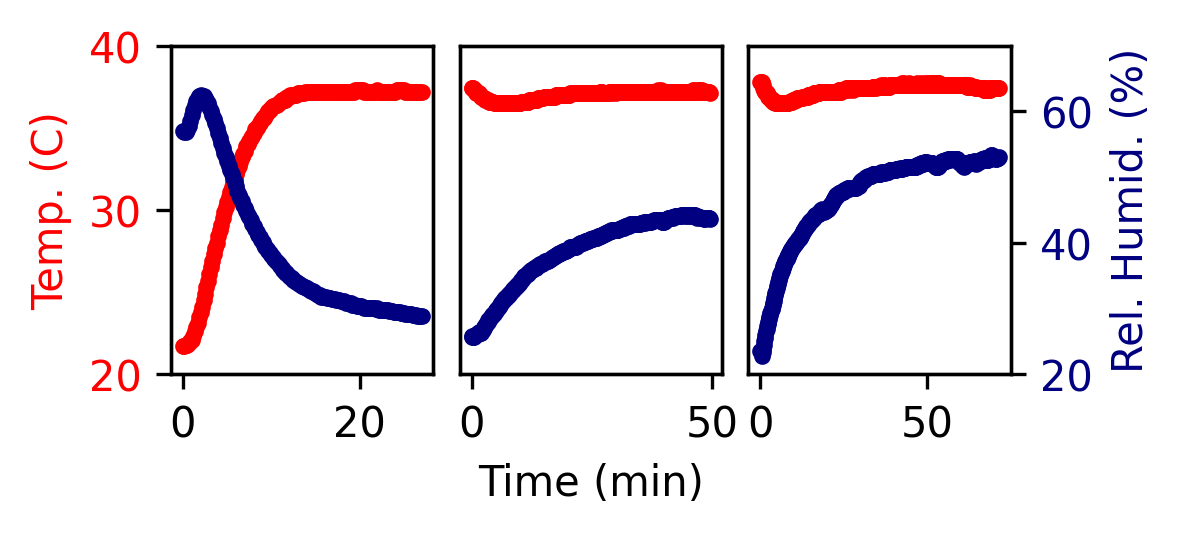

In [68]:
## 28.09.2020 Data Analysis

data = process_data(files_28_09)

fig, axs = plt.subplots(1,3, figsize=(4,1.5),sharey=False, dpi = 300)
k=0
for ax in axs:
    data_ = data[k]
    # The red axis
    ax.plot(data_[0], data_[1], '.', color='red')
    ax.set_ylim(20,40)
    if k==1:
        ax.set_xlabel('Time (min)')
    if k==0:
        ax.tick_params(axis='y', labelcolor='red')
        ax.set_ylabel('Temp. (C)',color='red')
    else:
        ax.tick_params(axis='y', labelleft=False, length = 0) # for some reason left = False wouldnt work but length = 0 does
    # The blue axis
    ax_ = ax.twinx()
    ax_.set_ylim(20,70)
    ax_.plot(data_[0], data_[2], '.',color='navy' )
    ax_.tick_params(axis='y', labelcolor='navy')
    if k==2:
        ax_.set_ylabel('Rel. Humid. (%)',color='navy')
    else:
        ax_.tick_params(axis='y', which='both', right=False, labelright = False)
    k=k+1
plt.subplots_adjust(left=0.15, right=0.85, bottom=0.15, wspace=0.1 )
plt.show()


# **29.10.2020**

**Measurement of temperature of humidity perturbation of the imaging chamber when a either a closed plate or a closed + parafilmed plate are present.** **bold text**

Run 1

Plates (0.4 and 0.5%) prepared at 16:08. Zoom chamber preheat since 15:11. Closed unparafilmed plate inserted at 15:48:03 \pm 10s. Plate insertion took 10-20s. 
Stopping at 16:46, opening the Zoom to vent while I take the plate weight. Zoom closed at 16:49 to preheat for the next plate. Plate lost 17 mg while in the Zoom.

Run 2

Parafilmed plate measurement. Into Zoom at 17:03. In Zoom until 17:49. I don't have the weight change for this one as it seems I weighed it out before parafilming it to put in the Zoom so my reference was off.


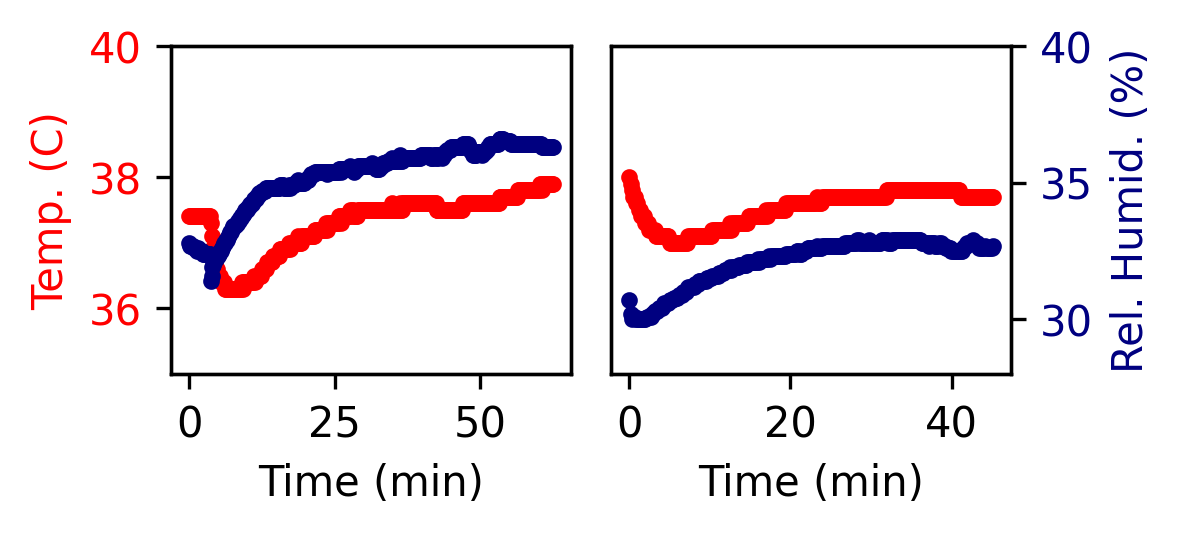

In [72]:
## 29.09.2020 

data = process_data(files_29_09)

fig, axs = plt.subplots(1,2, figsize=(4,1.5),sharey=False, dpi = 300)
k=0
for ax in axs:
    data_ = data[k]
    # The red axis
    ax.plot(data_[0], data_[1], '.', color='red')
    ax.set_ylim(35,40)
    ax.set_xlabel('Time (min)')
    if k==0:
        ax.tick_params(axis='y', labelcolor='red')
        ax.set_ylabel('Temp. (C)',color='red')
    else:
        ax.tick_params(axis='y', labelleft=False, length = 0) # for some reason left = False wouldnt work but length = 0 does
    # The blue axis
    ax_ = ax.twinx()
    ax_.set_ylim(28,40)
    ax_.plot(data_[0], data_[2], '.',color='navy' )
    ax_.tick_params(axis='y', labelcolor='navy')
    if k==1:
        ax_.set_ylabel('Rel. Humid. (%)',color='navy')
    else:
        ax_.tick_params(axis='y', which='both', right=False, labelright = False)
    k=k+1
plt.subplots_adjust(left=0.15, right=0.85, bottom=0.15, wspace=0.1 )
plt.show()

# **6.10.2020**

**Made a measurement of temperature/humidity with the eppendorfs inside **

First I turned the arduino and the unit just one after the other and then at 15:55:26 to 15:56:06 I have put and adjusted the eppendorfs in two goes. 

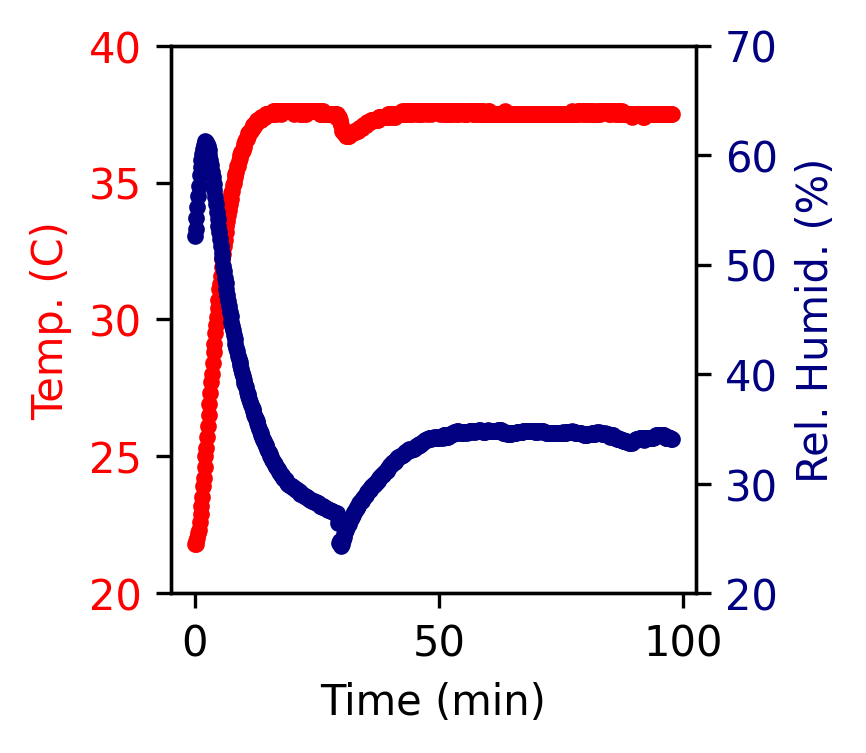

In [82]:

data = process_data(files_06_10)
fig, ax = plt.subplots(1,1, figsize=(2.5,2.5),sharey=False, dpi = 300)

data_ = data[k]
# The red axis
ax.plot(data[0], data[1], '.', color='red')
ax.set_ylim(20,40)
ax.set_xlabel('Time (min)')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Temp. (C)',color='red')
# The blue axis
ax_ = ax.twinx()
ax_.set_ylim(20,70)
ax_.plot(data[0], data[2], '.',color='navy' )
ax_.tick_params(axis='y', labelcolor='navy')
ax_.set_ylabel('Rel. Humid. (%)',color='navy')

plt.subplots_adjust(left=0.15, right=0.85, bottom=0.15, wspace=0.1 )
plt.show()

# **07.10.2020**

**Testing the OKOLab humidity control.**
**Bottom line is that I need to tweak the bubbling so the humidifier + plate itself don't conspire to oversaturate the chamber and cause condensation on the plate.** 

I ran the temperature/humidity sensor together with the humidifier system on the OKOLab. It's not mega controllable and the bubbles need to be at least at a simmer for humidity to be able to go > 50% at 37C. At a low boil I managed to get 75% ish. 


Testing with a sample inside: Tiny bubbles started appearing on the surface. If I take the sample out for a few seconds, and then back into the microscope the bubbles are gone. I couldn't see the bubbles by eye. Or they evaporated too quickly.  


I think the sample itself contributed >30 %  to the relative humidity and managed to oversaturate the chamber. I will set up a live measurement of humidity while the sample is inisde in order to figure out just how hard do I need to drive the humidifier. 




# **12.10.2020**

**Letting a dummy plate humidify the chamber on its own before turning on the humidifier unit, in hopes of finding a good way to not oversaturate the chamber**

Plates preparation was done some 10-20 min before the plate went into the chamber.
OKOLab was turned on at 14:16. Plate went in at 14:36. 1456 Humidity module turned on and set up with temperature of room. 15:53 Pump start gentle simmer. 1555 Increased a bit. 17:05 increased more (i dont know if the pump strenght fell off over time). 1732 turned down the pump to a little more than a simmer. Seems like this is driving up the humidity *88% and climibing. 17:34 turned up the pump until humidt falls to 70% -  actually got worse.  17:36 turned off pump. Sometime between 1830 and 1836 the condensation ended.

 

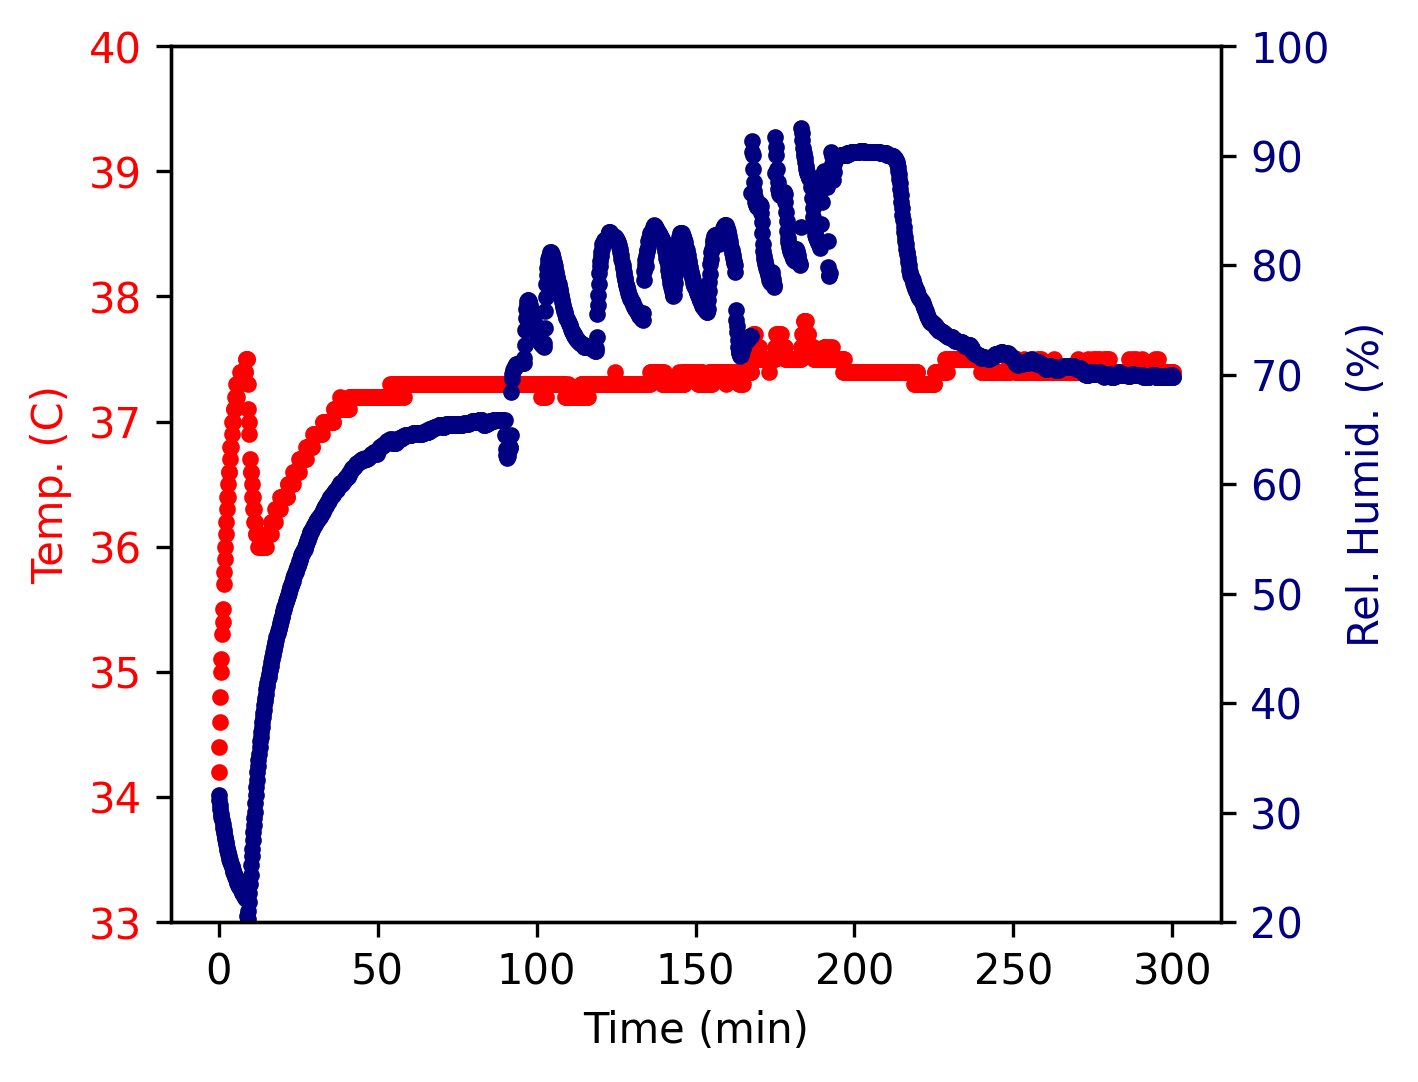

In [88]:
data = process_data(files_12_10)
fig, ax = plt.subplots(1,1, figsize=(5,4),sharey=False, dpi = 300)

data_ = data[k]
# The red axis
ax.plot(data[0], data[1], '.', color='red')
ax.set_ylim(33,40)
ax.set_xlabel('Time (min)')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Temp. (C)',color='red')
# The blue axis
ax_ = ax.twinx()
ax_.set_ylim(20,100)
ax_.plot(data[0], data[2], '.',color='navy' )
ax_.tick_params(axis='y', labelcolor='navy')
ax_.set_ylabel('Rel. Humid. (%)',color='navy')

plt.subplots_adjust(left=0.15, right=0.85, bottom=0.15, wspace=0.1 )
plt.show()

# **13.10.2020**

Well into the afternoon today, the humidity in the chamber was within 1% of 70%